#### Exercise 3 p. 414

In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2
features.

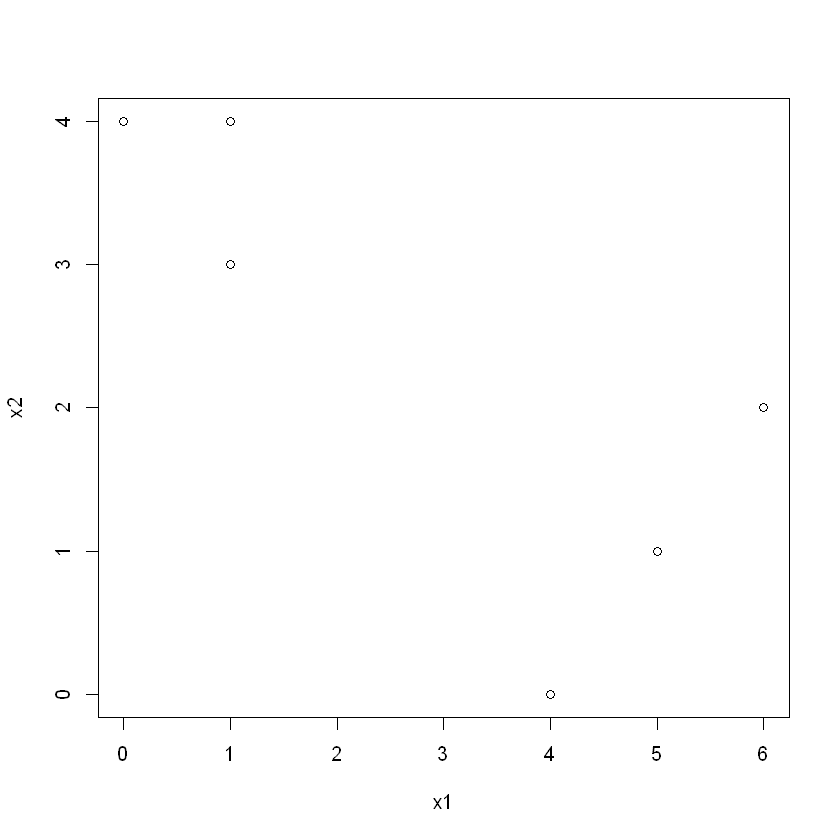

In [3]:
# We create the small dataset 
x1 <- c(1, 1, 0, 5, 6, 4)
x2 <- c(4, 3, 4, 1, 2, 0)
observ <-  cbind(x1,x2)

# Then we plot the observations
plot(x1, x2)

In [12]:
clust_label

[1] 2 1 2 1 1 1

In [14]:
observ

x1,x2
1,4
1,3
0,4
5,1
6,2
4,0


In [15]:
# Randomly assign a cluster label
clust_label <- sample(2, nrow(observ), replace=T)

# Compute the centroid for each cluster
x1_centr <- c(mean(observ[clust_label==1, 1]), mean(observ[clust_label==1, 2]))
x2_centr <- c(mean(observ[clust_label==2, 1]), mean(observ[clust_label==2, 2]))

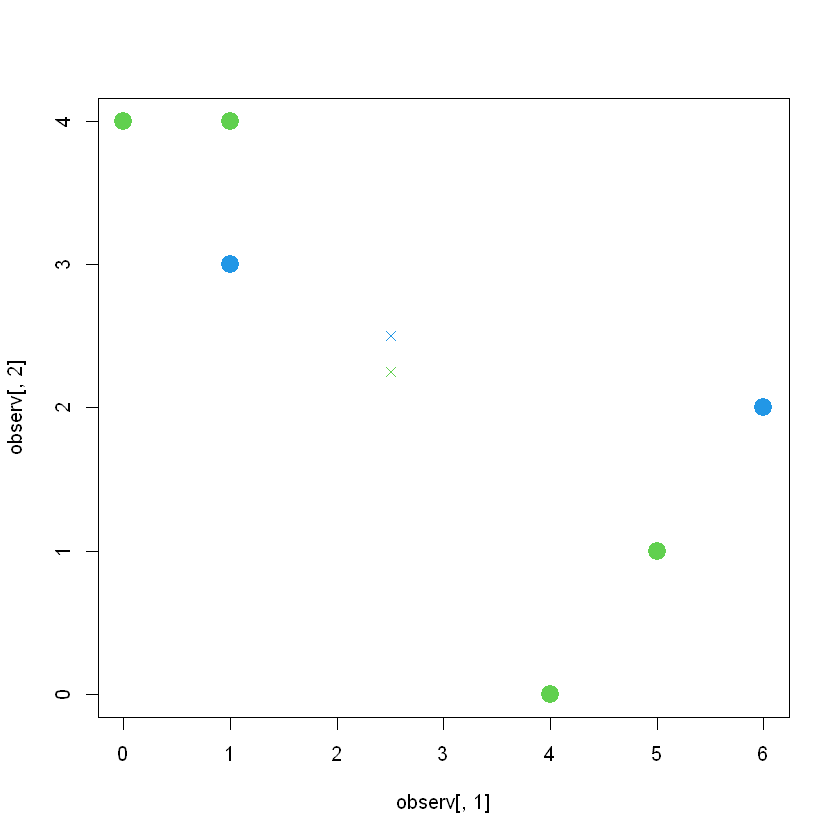

In [26]:
plot(observ[,1], observ[,2], col=(clust_label+2), pch=20, cex=3)
points(x1_centr[1], x1_centr[2], col=3, pch=4)
points(x1_centr[1], x2_centr[2], col=4, pch=4)

In [34]:
# Function to calculate euclid distance from point a to b (each point towards each centroid)
euclid <-  function(a, b) {
  return(sqrt((a[1] - b[1])^2 + (a[2]-b[2])^2))
}

centroid_detection <- function(df, c1, c2) {
    
  clust_label <- rep(0, nrow(df))
    # Looping through each row of the dataframe and checking which centroid is closer to the datapoint. 
    # Then obtaining the correspoding cluster to each one of them
  for (i in 1:nrow(df)) {
      # Checking the corresponding centroid to each dp
    if (euclid(df[i,], c1) < euclid(df[i,], c2)) {
      clust_label[i] = 1
    } else {
      clust_label[i] = 2
    }
  }
  return(clust_label)
}
clust_label <- centroid_detection(observ, x1_centr, x2_centr)

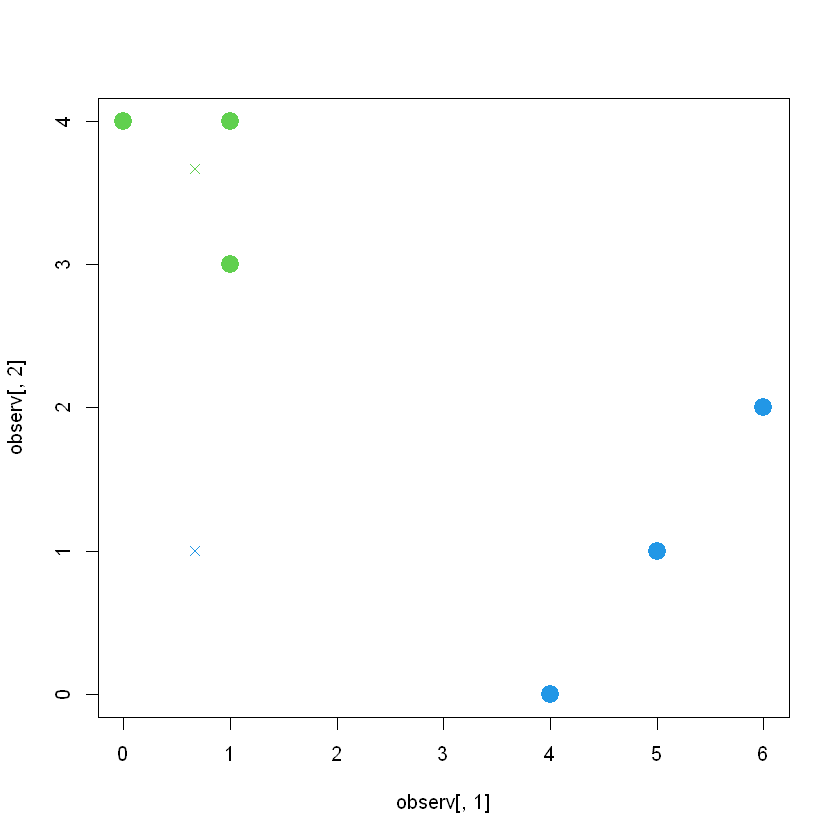

In [49]:
plot(observ[,1], observ[,2], col=(clust_label+2), pch=20, cex=3)
points(x1_centr[1], x1_centr[2], col=3, pch=4)
points(x1_centr[1], x2_centr[2], col=4, pch=4)

In [48]:
# Moving centroids towards the center of each cluster
# Repeat (c) and (d) until the answers obtained stop changing.
last_labels <- rep(0, 6)
while (!all(last_labels == clust_label)) {
  last_labels <- clust_label
  x1_centr <- c(mean(observ[clust_label==1, 1]), mean(observ[clust_label==1, 2]))
  x2_centr <- c(mean(observ[clust_label==2, 1]), mean(observ[clust_label==2, 2]))
  clust_label <- centroid_detection(observ, x1_centr, x2_centr)
}

#### Exercise 8 p. 416

In Section 10.2.3, a formula for calculating PVE was given in Equation 10.8. We also saw that the PVE can be obtained using the sdev
output of the prcomp() function. On the USArrests data, calculate PVE in two ways

In [53]:
# First approach: Using the sdev output of the prcomp() function
output_pr <- prcomp(USArrests, center=T, scale=T)

print(output_pr)

var_pr <- output_pr$sdev^2
pve <- var_pr / sum(var_pr)
print(pve)

Standard deviations (1, .., p=4):
[1] 1.5748783 0.9948694 0.5971291 0.4164494

Rotation (n x k) = (4 x 4):
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432
[1] 0.62006039 0.24744129 0.08914080 0.04335752


In [56]:
# Second approach: By applying Equation 10.8 directly
# Calculating loadings
loadings <- output_pr$rotation
pve_compar <- rep(NA, 4)
sec_mean <- apply(USArrests, 2, mean)
sec_sdv <- sqrt(apply(USArrests, 2, var))
dsc <- sweep(USArrests, MARGIN=2, sec_mean, "-")
dsc <- sweep(dsc, MARGIN=2, sec_sdv, "/")

for (i in 1:4) {
  proto_x <- sweep(dsc, MARGIN=2, loadings[,i], "*")
  pc_x <- apply(proto_x, 1, sum)
  pve_compar[i] <- sum(pc_x^2)
}
pve_compar <- pve_compar/sum(dsc^2)
pve2

[1] 0.62006039 0.24744129 0.08914080 0.04335752

#### Exercise 9 p. 416

Consider the USArrests data. We will now perform hierarchical clustering on the states.

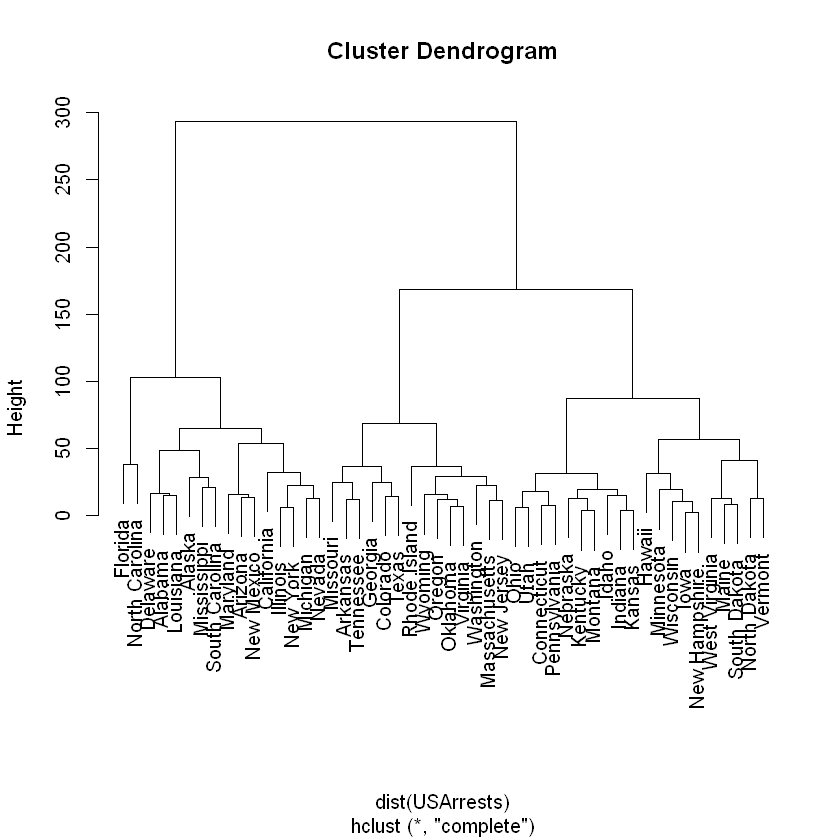

In [58]:
# a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states
set.seed(123)
hierarc_complete = hclust(dist(USArrests), method="complete")
plot(hierarc_complete)

In [60]:
# b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?
cut <- cutree(hierarc_complete, 3)
table(cut)

cut
 1  2  3 
16 14 20 

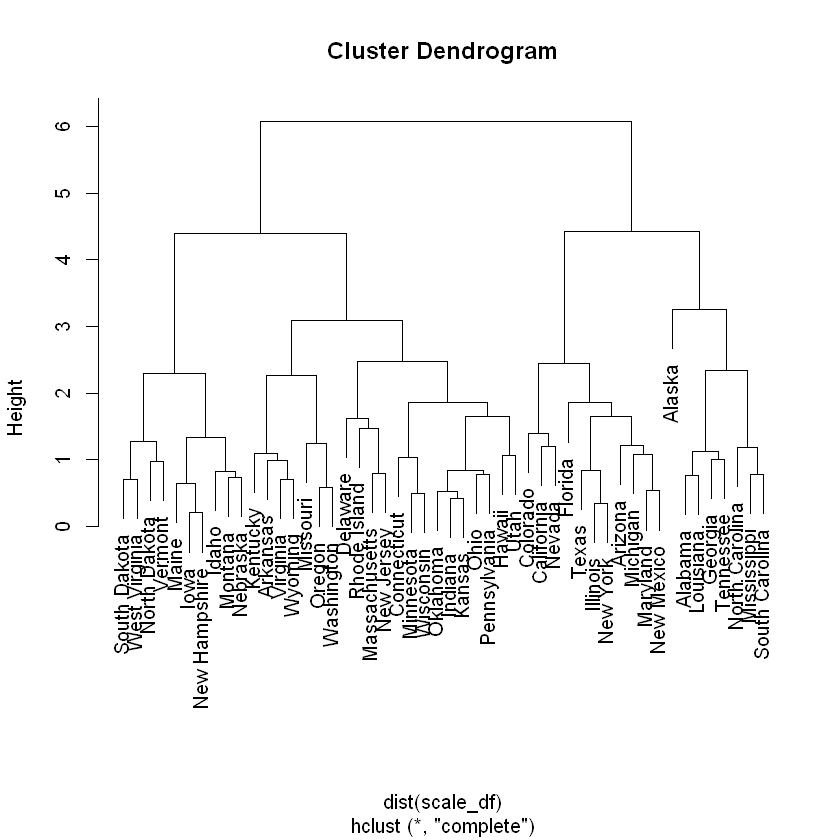

In [61]:
# c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.
scale_df <- scale(USArrests)
scaled_complete <- hclust(dist(scale_df), method="complete")
plot(scaled_complete)


In [63]:
# d) What effect does scaling the variables have on the hierarchical clustering obtained? 
table(cutree(scaled_complete, 3))


 1  2  3 
 8 11 31 

#### Exercise 10 p. 417

In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data.

In [78]:
# a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.
set.seed(123)
matrix <- matrix(rnorm(20*3*50, mean=0, sd=0.001), ncol=50)
matrix[1:20, 2] <- 1
matrix[21:40, 1] <- 2
matrix[21:40, 2] <- 2
matrix[41:60, 1] <-  1

In [79]:
matrix

-5.604756e-04,1.000000e+00,1.176466e-04,-1.063326e-03,-7.886220e-04,-7.152422e-04,-2.052993e-04,1.779503e-03,2.045071e-05,-2.732481e-04,⋯,-4.831351e-04,1.390366e-05,1.242999e-03,1.206196e-03,-1.259027e-03,-2.006120e-03,-6.452325e-04,-1.073997e-04,-1.072825e-03,6.966287e-04
-2.301775e-04,1.000000e+00,-9.474746e-04,1.263185e-03,-5.021987e-04,-7.526890e-04,6.511933e-04,2.864244e-04,3.140577e-04,-4.686998e-04,⋯,-5.313469e-04,-5.162160e-04,1.982210e-03,-8.459094e-05,2.574082e-04,-2.058264e-04,-2.341175e-04,-1.385558e-03,-2.298288e-04,-6.598146e-05
1.558708e-03,1.000000e+00,-4.905574e-04,-3.496504e-04,1.496061e-03,-9.385387e-04,2.737665e-04,1.263159e-04,1.328215e-03,7.041673e-04,⋯,-5.876848e-04,-1.190543e-03,-6.464418e-04,5.632623e-04,-8.242933e-04,-1.649057e-03,-1.108161e-03,-5.921406e-04,6.216372e-04,-1.343480e-04
7.050839e-05,1.000000e+00,-2.560922e-04,-8.655129e-04,-1.137304e-03,-1.052513e-03,1.024673e-03,1.272267e-03,1.213184e-04,-1.197364e-03,⋯,-4.116979e-04,-4.130692e-04,9.661893e-04,5.281944e-04,-1.060624e-03,-1.530787e-05,-2.732242e-04,-1.105334e-03,8.374455e-04,1.654741e-03
1.292877e-04,1.000000e+00,1.843862e-03,-2.362796e-04,-1.790516e-04,-4.371595e-04,8.176594e-04,-7.184662e-04,7.128423e-04,8.663661e-04,⋯,7.091856e-04,3.719949e-04,-1.427267e-03,4.230384e-04,7.255055e-04,-8.949017e-04,-1.133441e-03,1.039089e-03,-3.028880e-04,3.718949e-04
1.715065e-03,1.000000e+00,-6.519499e-04,-1.971759e-04,1.902362e-03,3.311792e-04,-2.097932e-04,-4.503386e-04,7.788600e-04,8.641525e-04,⋯,2.563968e-04,9.234296e-05,-4.574838e-04,-5.967642e-04,-7.079319e-04,4.631972e-05,3.593080e-04,2.542904e-03,-1.515525e-04,6.235405e-04
4.609162e-04,1.000000e+00,2.353866e-04,1.109920e-03,-1.009749e-04,-2.014210e-03,3.781678e-04,2.397452e-03,9.147733e-04,-1.198622e-03,⋯,-1.856361e-03,6.934838e-04,9.454667e-04,-1.250844e-03,-1.440488e-04,4.610041e-04,3.356448e-04,-6.737158e-04,-1.628515e-04,4.748986e-04
-1.265061e-03,1.000000e+00,7.796085e-05,8.473729e-05,-1.359841e-03,2.119804e-04,-9.454088e-04,1.112919e-05,-5.743946e-04,6.394920e-04,⋯,-1.860588e-03,9.408992e-04,-7.383892e-04,-1.681601e-03,-9.737156e-04,-5.037388e-04,8.109844e-04,-9.223001e-05,5.784553e-05,5.716346e-04
-6.868529e-04,1.000000e+00,-9.618566e-04,7.540538e-04,-6.647694e-04,1.236675e-03,8.569230e-04,1.633568e-03,1.626881e-03,2.430227e-03,⋯,-2.283409e-05,8.284640e-04,3.456407e-04,-4.562964e-04,5.594443e-05,-1.022398e-03,4.164561e-04,2.797350e-04,1.537145e-03,1.335736e-03
-4.456620e-04,1.000000e+00,-7.130809e-05,-4.992920e-04,4.854600e-04,2.037574e-03,-4.610383e-04,-1.438507e-03,-3.809567e-04,-5.572155e-04,⋯,1.499387e-04,-3.244892e-04,-9.004447e-04,6.827932e-04,4.923466e-04,-6.117422e-04,1.594114e-03,2.708959e-03,-7.267125e-04,-5.710416e-05
1.224082e-03,1.000000e+00,1.444551e-03,2.144453e-04,-3.756029e-04,1.301176e-03,2.416773e-03,-1.905168e-04,-1.057842e-04,8.449042e-04,⋯,-2.307474e-03,-1.328156e-03,-3.703507e-04,-2.390375e-04,5.025453e-04,-6.673935e-04,-3.861379e-04,-2.329003e-03,-2.047627e-04,2.428439e-04


In [ ]:
# b) Perform PCA on the 60 observations and plot the first two principal component score vectors.
pca <- prcomp(matrix)
plot(pca$matrix[,1:2], col=2:4, xlab="Z1", ylab="Z2", pch=19) 